Assumptions based on details provided: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

In [1]:
import numpy
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading mtcars dataset
import statsmodels.api as sm
mtcars = sm.datasets.get_rdataset('mtcars')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = mtcars.data

In [4]:
#resetting index value to access car name column
df = df.reset_index()

In [5]:
df = df.rename(columns={"index":"car"})

In [6]:
df

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


1. Find the car with the best mpg, worst mpg.

In [7]:
#Best MPG
max_mpg = max(df['mpg'])
for car in df.loc[df['mpg'] == max_mpg]['car']:
  print(car, max_mpg)

Toyota Corolla 33.9


In [38]:
#Alternative method to the above code
#print(df.loc[df['mpg'] == max_mpg]['car'].to_string(index=False), max_mpg)

In [8]:
#Worst MPG
min_mpg = min(df['mpg'])
for car in df.loc[df['mpg'] == min_mpg]['car']:
  print(car, min_mpg)

Cadillac Fleetwood 10.4
Lincoln Continental 10.4


2. Find the car with the worsthorsepower, best qsec. 


In [9]:
worst_hp = min(df['hp'])
for car in df.loc[df['hp'] == worst_hp]['car']:
  print(car, worst_hp)

Honda Civic 52


In [10]:
best_qsec = max(df['qsec'])
for car in df.loc[df['qsec'] == best_qsec]['car']:
  print(car, best_qsec)

Merc 230 22.9


3. Find 5 number summary and draw the boxplot of displacement

In [11]:
quartiles = percentile(df['disp'], [0, 25, 50, 75, 100])

In [12]:
for i in range(len(quartiles)):
  print(25*i, quartiles[i])

0 71.1
25 120.825
50 196.3
75 326.0
100 472.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f4a3bbd1890>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4a3bbde910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4a3bbe6950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4a3bbe6410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4a3bbd1e50>,
  <matplotlib.lines.Line2D at 0x7f4a3bbde3d0>]}

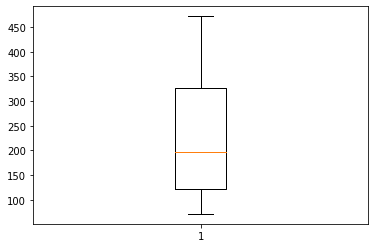

In [13]:
plt.boxplot(quartiles)

4. Draw a histogram for MPG and comment on the distribution. 

(array([2., 4., 6., 6., 5., 3., 1., 1., 2., 2.]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]),
 <a list of 10 Patch objects>)

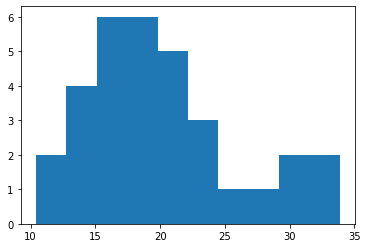

In [14]:
plt.hist(df['mpg'])

In [15]:
#Comments


5. What is average MPG for manual vs. automatic cars?

In [16]:
avg_mpg_automatic = df[df['am'] == 0]['mpg'].mean()
print(avg_mpg_automatic)

17.147368421052633


In [17]:
avg_mpg_manual = df[df['am'] == 1]['mpg'].mean()
print(avg_mpg_manual)

24.39230769230769


6. Draw a side by side box plot of fuel efficiency (MPG) for transmission (manual vs. automatic) cars. Analyze and write about fuel efficiency in each group(manual vs. automatic). 

In [18]:
mpg_automatic_quartiles = percentile(df[df['am']==0]['mpg'], [0, 25, 50, 75, 100])

In [19]:
mpg_manual_quartiles = percentile(df[df['am']==1]['mpg'], [0, 25, 50, 75, 100])

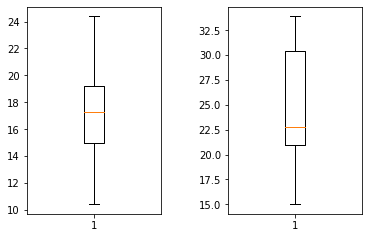

In [22]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=3.0)

plt.subplot(1,2,1)
plt.boxplot(mpg_automatic_quartiles)

plt.subplot(1,2,2)
plt.boxplot(mpg_manual_quartiles)
plt.show()

In [23]:
#Comments


7. What is the correlation between the weight of the car and MPG? Draw a scatter plot. What is the relationship between the two attributes?

In [24]:
df_wt_mpg = pd.DataFrame(df, columns = ['wt', 'mpg'])

In [25]:
df_wt_mpg.corr()

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


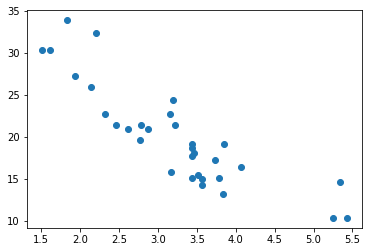

In [26]:
plt.scatter(df['wt'],df['mpg'])

In [27]:
#Comments

8. Draw a side by side box plot of fuel efficiency for number of gears. Analyze and write about fuel efficiency and number of gears. 

In [28]:
mpg_3gear_quartiles = percentile(df[df['gear']==3]['mpg'], [0, 25, 50, 75, 100])

In [29]:
mpg_4gear_quartiles = percentile(df[df['gear']==4]['mpg'], [0, 25, 50, 75, 100])

In [30]:
mpg_5gear_quartiles = percentile(df[df['gear']==5]['mpg'], [0, 25, 50, 75, 100])

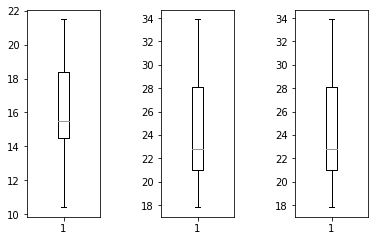

In [31]:
figure, axes = plt.subplots(nrows=1, ncols=3)
figure.tight_layout(pad=3.0)

plt.subplot(1,3,1)
plt.boxplot(mpg_3gear_quartiles)

plt.subplot(1,3,2)
plt.boxplot(mpg_4gear_quartiles)

plt.subplot(1,3,3)
plt.boxplot(mpg_4gear_quartiles)

plt.show()

9. Create a crosstab displaying horse power and number of cylinders and explain the relationship between the two attributes.

In [32]:
pd.crosstab(df['cyl'], df['hp'], rownames=['cyl'], colnames=['hp'])

hp,52,62,65,66,91,93,95,97,105,109,110,113,123,150,175,180,205,215,230,245,264,335
cyl,,,,,,,,,,,,,,,,,,,,,,
4,1,1,1,2,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,3,0,2,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,1,1,1,2,1,1


10. Draw a scatter plot to understand the relationship between displacement and gross horse power. Use the correlation coefficient and infer the relationship.

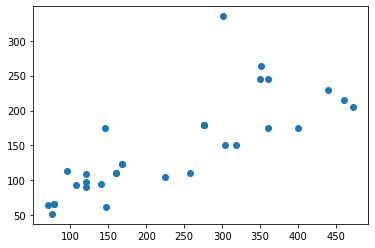

In [34]:
plt.scatter(df['disp'], df['hp'])

In [35]:
df_disp_hp = pd.DataFrame(df, columns = ['disp', 'hp'])

In [36]:
df_disp_hp.corr()

,disp,hp
disp,1.000000,0.790949
hp,0.790949,1.000000
